## Análisis de datos - Clase 3

### Normalización y estandarización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
# Cargo el dataset de penguins
df = sns.load_dataset('penguins').dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

# Selecciono algunas columnas numéricas para la normalización y estandarización
columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_subset = df[columns]
df_subset.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [3]:
df_subset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### Normalización (Min-Max)

In [4]:
# Normalización (Min-Max)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)
print("Normalizado:\n", df_normalized.head())

Normalizado:
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0        0.254545       0.666667           0.152542     0.291667
1        0.269091       0.511905           0.237288     0.305556
2        0.298182       0.583333           0.389831     0.152778
3        0.167273       0.738095           0.355932     0.208333
4        0.261818       0.892857           0.305085     0.263889


In [5]:
df_normalized.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,0.429888,0.482282,0.490088,0.417154
std,0.198530,0.235094,0.238334,0.222765
min,0.000000,0.000000,0.000000,0.000000
25%,0.259091,0.297619,0.305085,0.236111
50%,0.449091,0.500000,0.423729,0.375000
75%,0.596364,0.666667,0.694915,0.569444
max,1.000000,1.000000,1.000000,1.000000


#### Estandarización (Z-Score)

In [6]:
# Estandarización (Z-Score)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)
print("\nEstandarizado:\n", df_standardized.head())


Estandarizado:
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.884499       0.785449          -1.418347    -0.564142
1       -0.811126       0.126188          -1.062250    -0.501703
2       -0.664380       0.430462          -0.421277    -1.188532
3       -1.324737       1.089724          -0.563715    -0.938776
4       -0.847812       1.748985          -0.777373    -0.689020


In [7]:
df_standardized.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02
mean,1.662088e-16,-1.412775e-15,-8.310441e-16,4.155221e-17
std,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00
min,-2.168526e+00,-2.054446e+00,-2.059320e+00,-1.875362e+00
25%,-8.615697e-01,-7.866355e-01,-7.773731e-01,-8.138982e-01
50%,9.686524e-02,7.547549e-02,-2.788381e-01,-1.895079e-01
75%,8.397670e-01,7.854492e-01,8.606705e-01,6.846384e-01
max,2.875868e+00,2.205397e+00,2.142618e+00,2.620248e+00


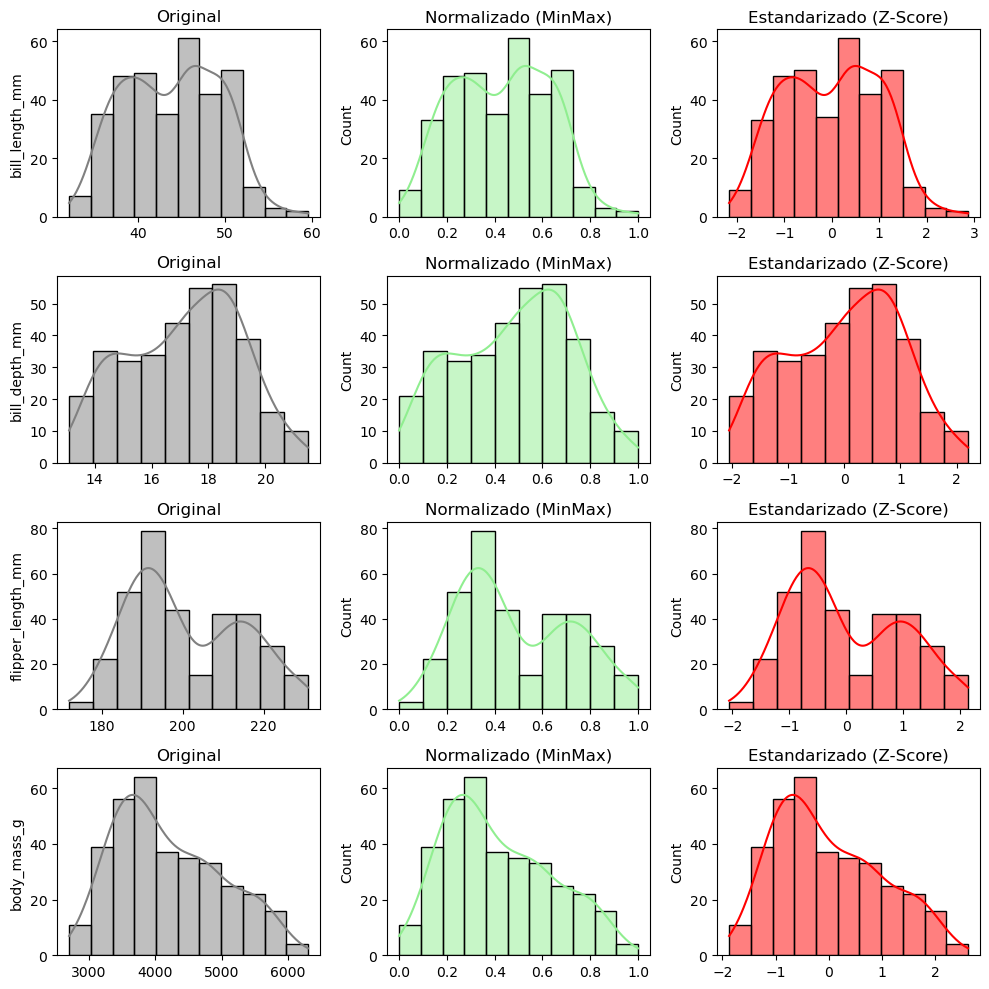

In [8]:
# Gráfico
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
titles = ["Original", "Normalizado (MinMax)", "Estandarizado (Z-Score)"]

# Recorrer cada variable y graficarla en las tres columnas
for i, col in enumerate(columns):
    sns.histplot(df_subset[col], kde=True, ax=axes[i, 0], color="gray")
    sns.histplot(df_normalized[col], kde=True, ax=axes[i, 1], color="lightgreen")
    sns.histplot(df_standardized[col], kde=True, ax=axes[i, 2], color="red")

    # Etiquetas
    axes[i, 0].set_ylabel(col)
    for j in range(3):
        axes[i, j].set_xlabel("")
        axes[i, j].set_title(titles[j])

# Ajustar el layout
plt.tight_layout()
plt.show()
